In [1]:
def bellman_ford(graph, source, show_callback=None):
    from math import inf
    dist, par = dict.fromkeys(graph, inf), dict.fromkeys(graph, None)
    dist[source] = 0
    for _ in dist:
        has_changes = False
        for v in graph:
            for to, weight in graph[v]:
                upd_dist = dist[v] + weight
                if upd_dist < dist[to]:
                    dist[to] = upd_dist
                    par[to] = v
                    has_changes = True
                    if show_callback:
                        show_callback(v, to, upd_dist)
                else:
                    if show_callback:
                        show_callback(v, to, None)
        if not has_changes:
            return dist, par
    return None, None

def dijkstra(graph, source):
    from math import inf
    dist, par = dict.fromkeys(graph, inf), dict.fromkeys(graph, None)
    dist[source] = 0
    from sortedcontainers import SortedSet
    queue = SortedSet([(dist[source], source)])
    while queue:
        _, v = queue.pop(0)
        for to, weight in graph[v]:
            upd_dist = dist[v] + weight
            if upd_dist < dist[to]:
                queue.discard((dist[to], to))
                dist[to] = upd_dist
                queue.add((dist[to], to))
                par[to] = v
    return dist, par

def generate_graph(n, m, edge_bounds, seed=None):
    graph = {v:[] for v in range(n)}
    import random
    random.seed(seed)
    for _ in range(m):
        v, u, weight = random.randint(0, n-1), random.randint(0, n-1), random.randint(*edge_bounds)
        graph[v].append((u, weight))
        graph[u].append((v, weight))
    return graph

In [2]:
for _ in range(2000):
    graph = generate_graph(20, 100, (1, 1000))
    if dijkstra(graph, 0)[0] != bellman_ford(graph, 0)[0]:
        print('error')
    pass

graph = generate_graph(100, 10000, (1, 1000000000))
%timeit bellman_ford(graph, 0)

16.9 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Асимптотика алгоритма Беллмана—Форда есть O(|V|\*|E|).

In [3]:
V_NUM = 6
E_NUM = 10
EDGE_BOUNDS = (10, 100)
SOURCE = 0
SEED = 228
PLOT_SIZE = (10,10)
NODE_SIZE = 1000
INTERACTIVE = False
TIME_TO_SLEEP = 3

graph = generate_graph(V_NUM, E_NUM, EDGE_BOUNDS, SEED)
from math import sin, cos, pi, inf
points = [[cos(i*2*pi/V_NUM), sin(i*2*pi/V_NUM)] for i in range(V_NUM)]
dist = dict.fromkeys(graph, inf)
dist[SOURCE] = 0

from matplotlib import pyplot as plt

iteration=0
def background():
    global iteration
    print('iteration {}'.format(iteration))
    iteration+=1
    print(dist)
    plt.figure(figsize=PLOT_SIZE)
    for v, pt in enumerate(points):
        plt.scatter(*pt, s=NODE_SIZE)
        plt.text(*pt, '{}'.format(v))
        for to, weight in graph[v]:
            plt.plot([points[v][0], points[to][0]], [points[v][1], points[to][1]])
    pass

def show_callback(v, to, weight):
    if INTERACTIVE:
        from time import sleep
        sleep(TIME_TO_SLEEP)
        from IPython.display import clear_output
        clear_output()
    if weight:
        dist[to] = weight
    background()
    if weight:
        print('{}->{} relaxed to {}'.format(v, to, weight))
    else:
        print('{}->{} not relaxed'.format(v, to))
    plt.plot([points[v][0], points[to][0]], [points[v][1], points[to][1]], linewidth=10 if weight else 5)
    plt.show()
    pass

In [4]:
graph

{0: [(4, 26), (5, 82)],
 1: [(4, 38), (4, 82)],
 2: [(5, 98), (3, 56)],
 3: [(4, 87), (5, 28), (2, 56)],
 4: [(1, 38), (3, 87), (0, 26), (5, 61), (1, 82)],
 5: [(5, 38), (5, 38), (3, 28), (2, 98), (4, 61), (0, 82)]}

iteration 0
{0: 0, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf}


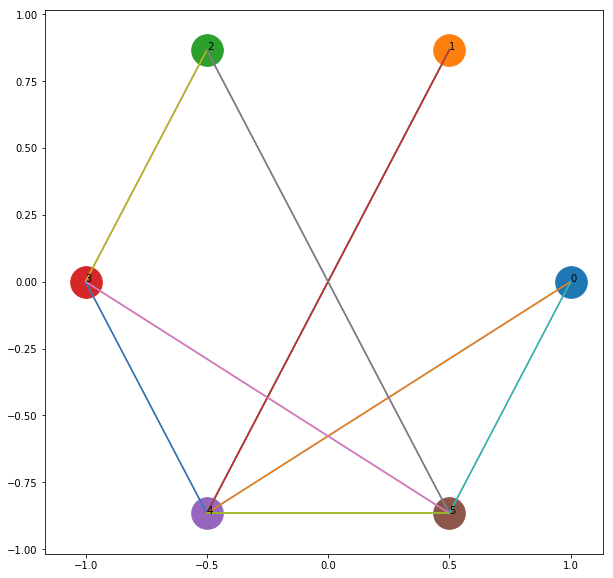

iteration 1
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: inf}
0->4 relaxed to 26


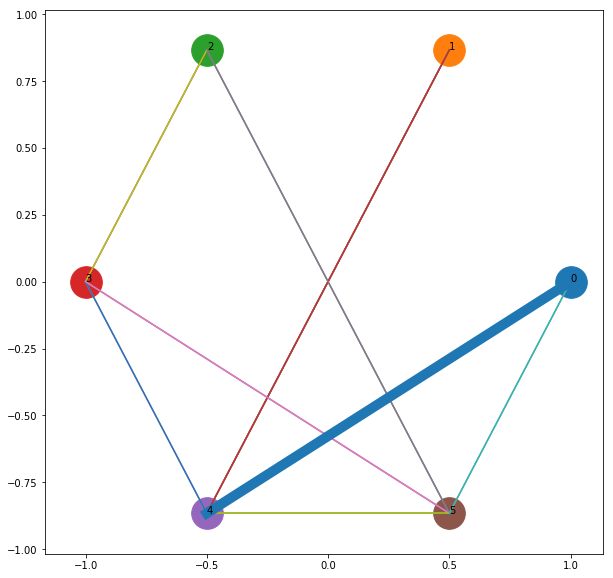

iteration 2
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
0->5 relaxed to 82


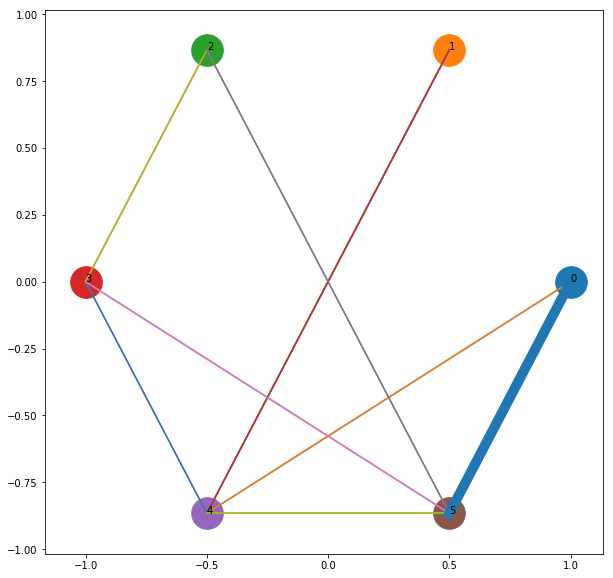

iteration 3
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
1->4 not relaxed


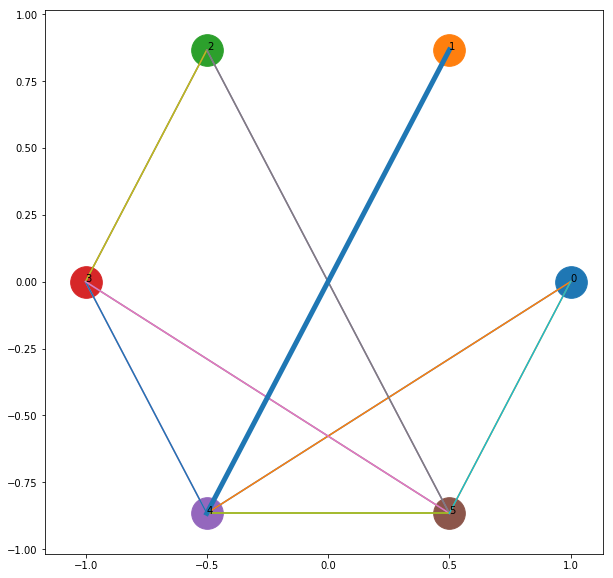

iteration 4
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
1->4 not relaxed


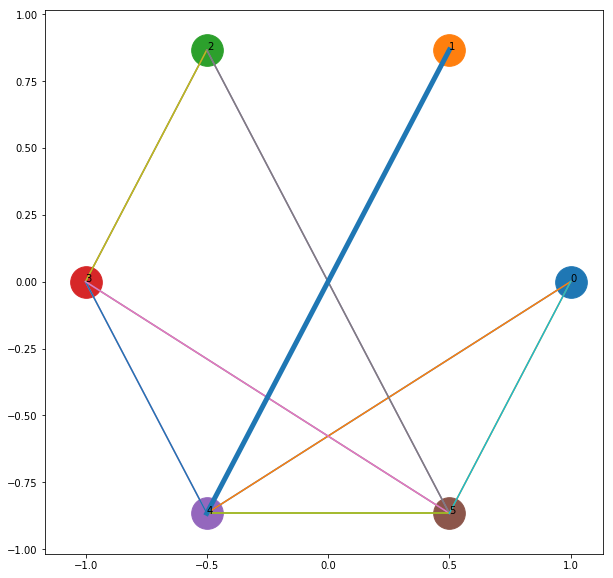

iteration 5
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
2->5 not relaxed


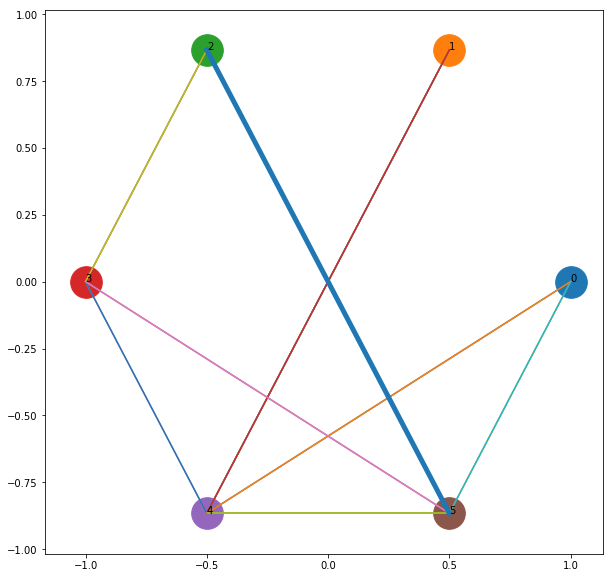

iteration 6
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
2->3 not relaxed


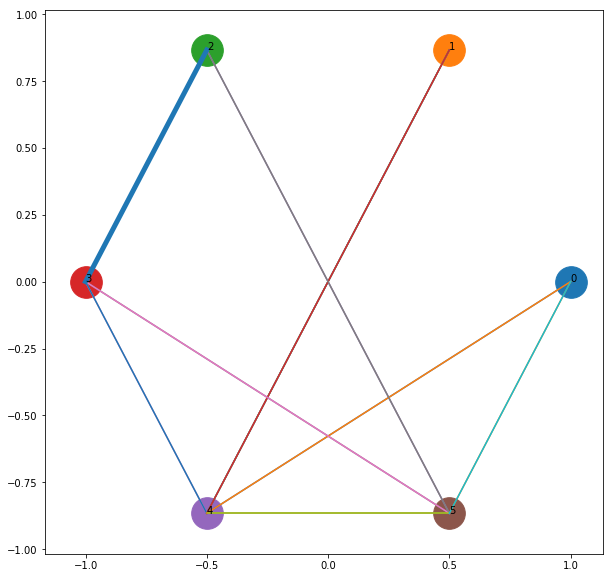

iteration 7
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
3->4 not relaxed


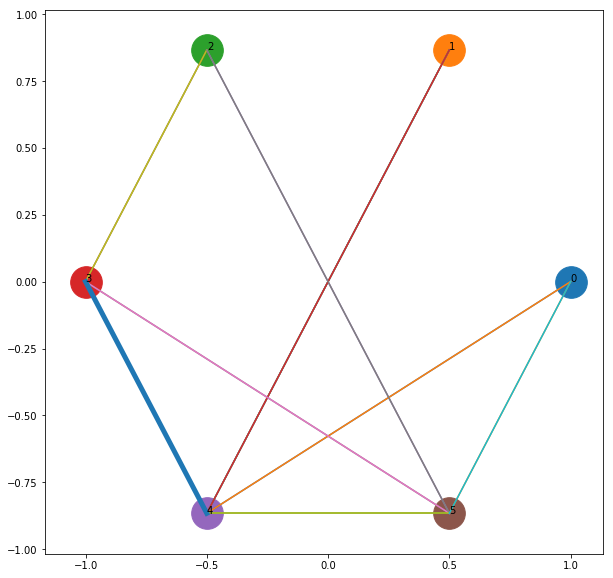

iteration 8
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
3->5 not relaxed


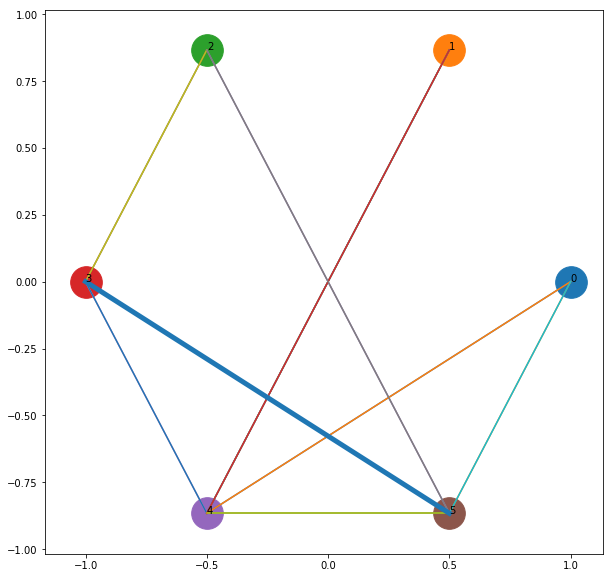

iteration 9
{0: 0, 1: inf, 2: inf, 3: inf, 4: 26, 5: 82}
3->2 not relaxed


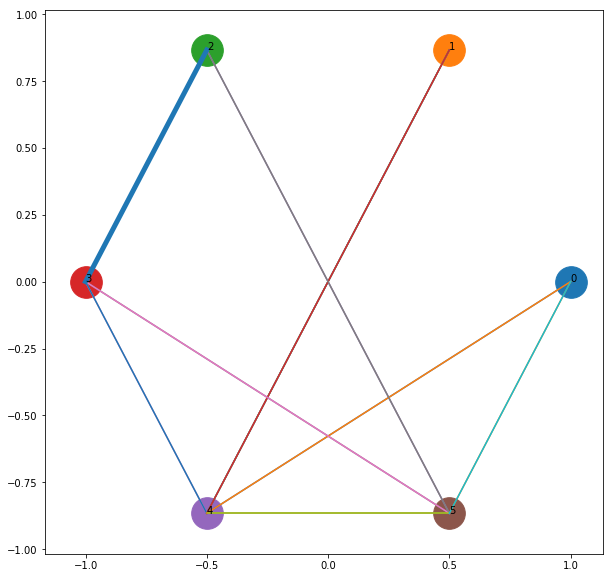

iteration 10
{0: 0, 1: 64, 2: inf, 3: inf, 4: 26, 5: 82}
4->1 relaxed to 64


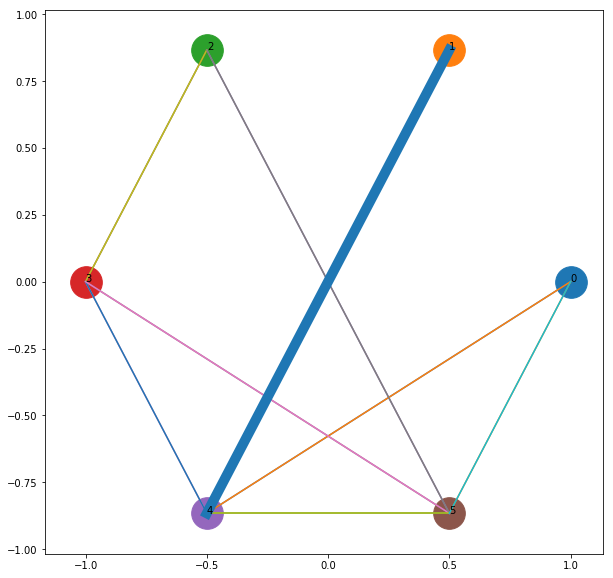

iteration 11
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
4->3 relaxed to 113


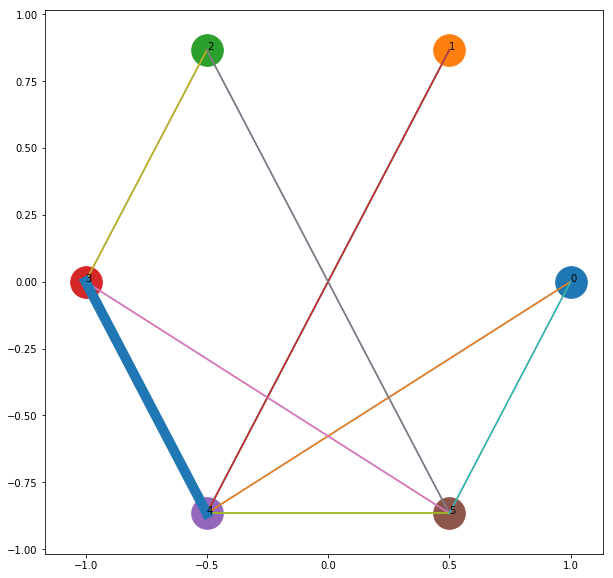

iteration 12
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
4->0 not relaxed


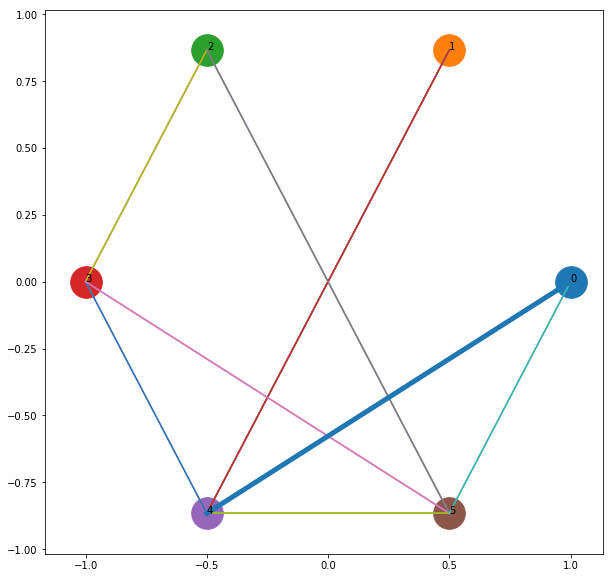

iteration 13
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
4->5 not relaxed


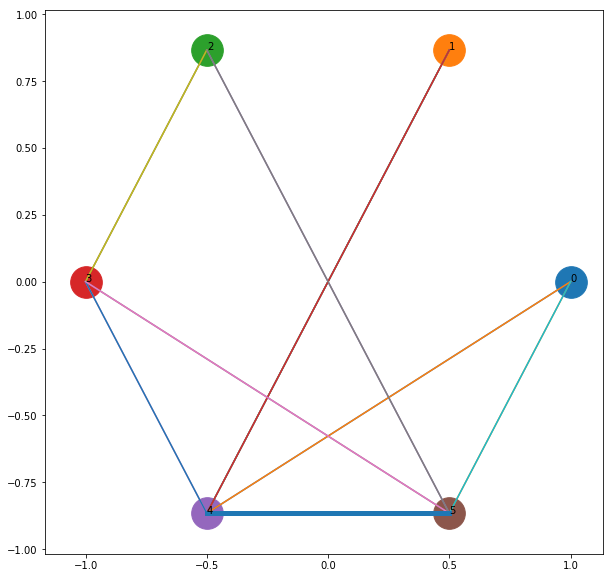

iteration 14
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
4->1 not relaxed


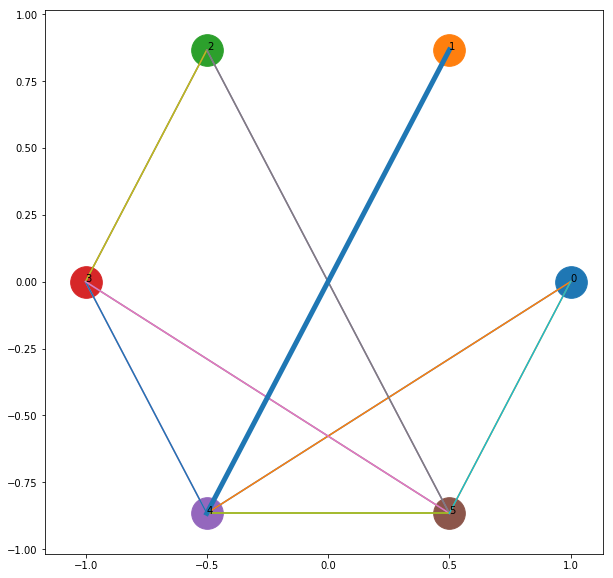

iteration 15
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
5->5 not relaxed


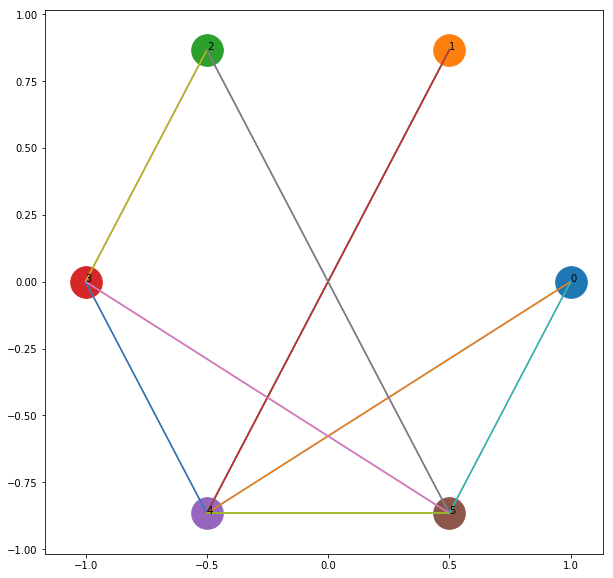

iteration 16
{0: 0, 1: 64, 2: inf, 3: 113, 4: 26, 5: 82}
5->5 not relaxed


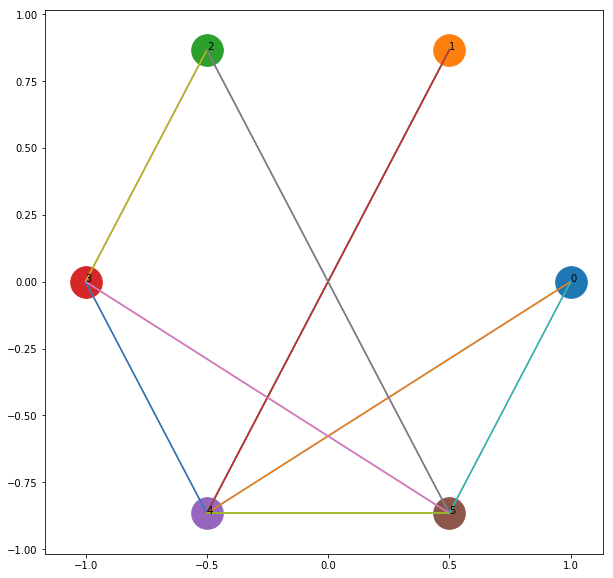

iteration 17
{0: 0, 1: 64, 2: inf, 3: 110, 4: 26, 5: 82}
5->3 relaxed to 110


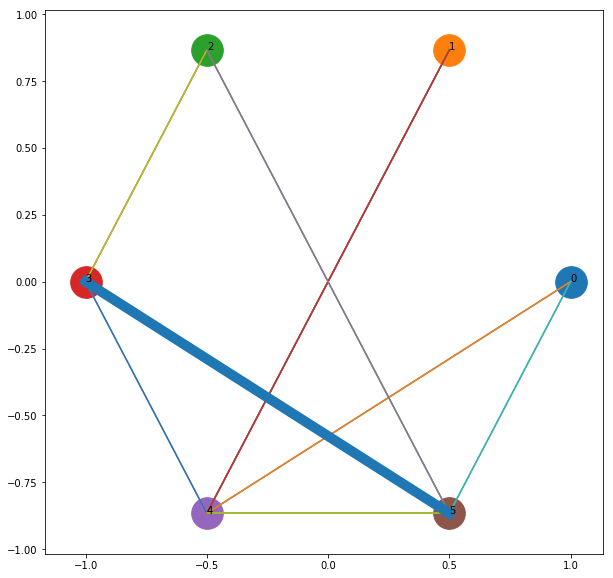

iteration 18
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
5->2 relaxed to 180


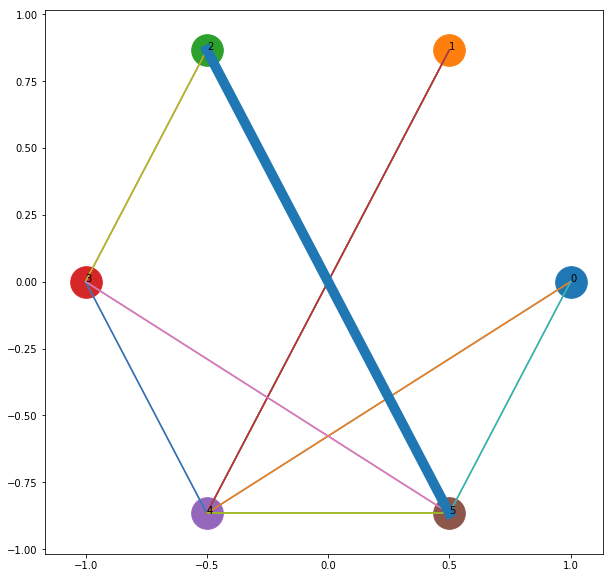

iteration 19
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
5->4 not relaxed


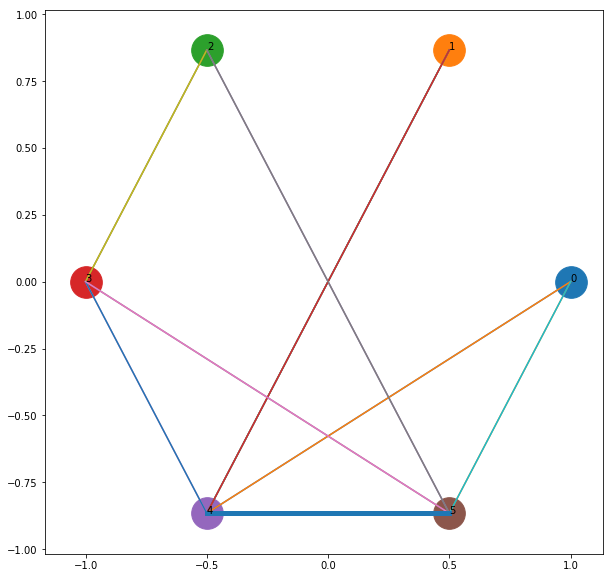

iteration 20
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
5->0 not relaxed


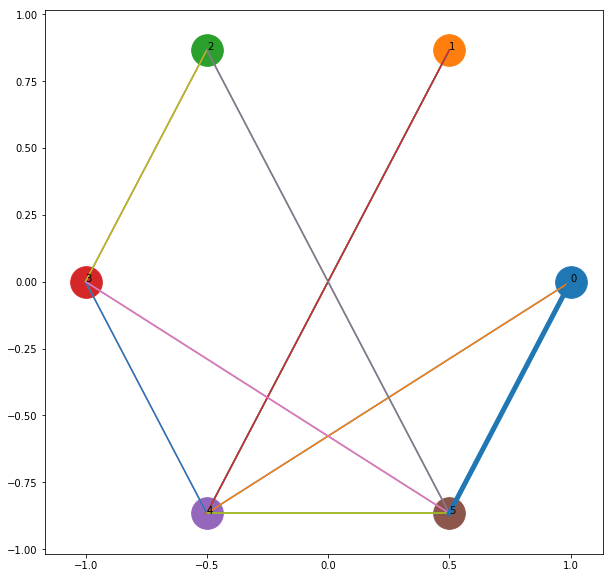

iteration 21
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
0->4 not relaxed


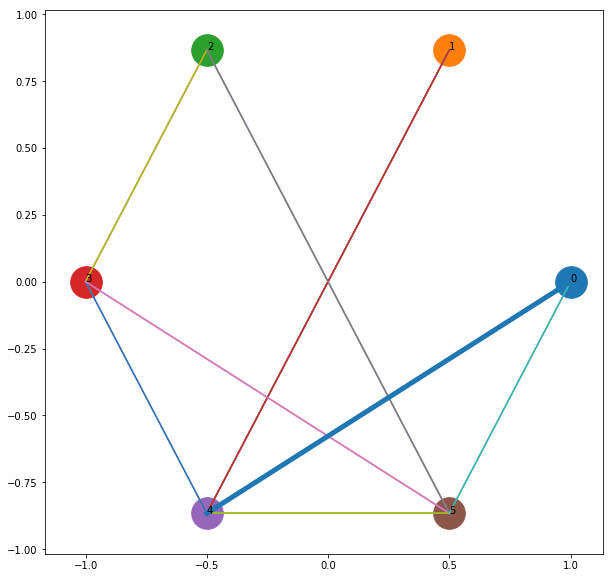

iteration 22
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
0->5 not relaxed


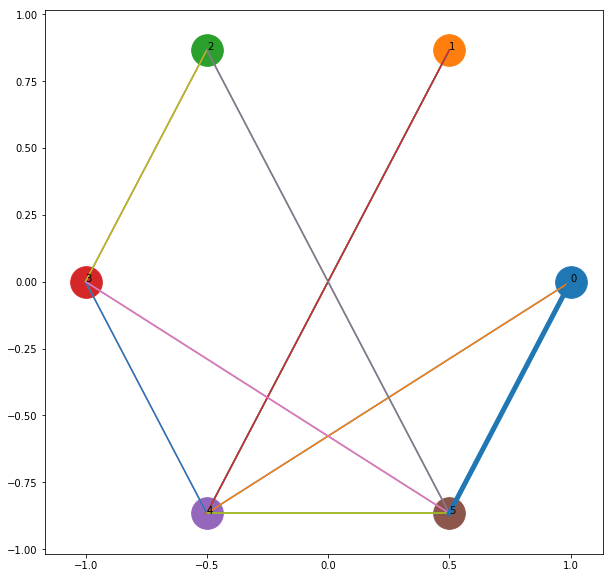

iteration 23
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
1->4 not relaxed


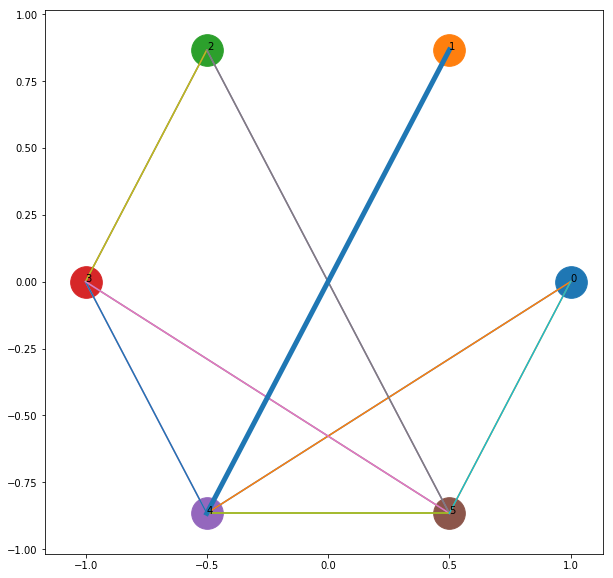

iteration 24
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
1->4 not relaxed


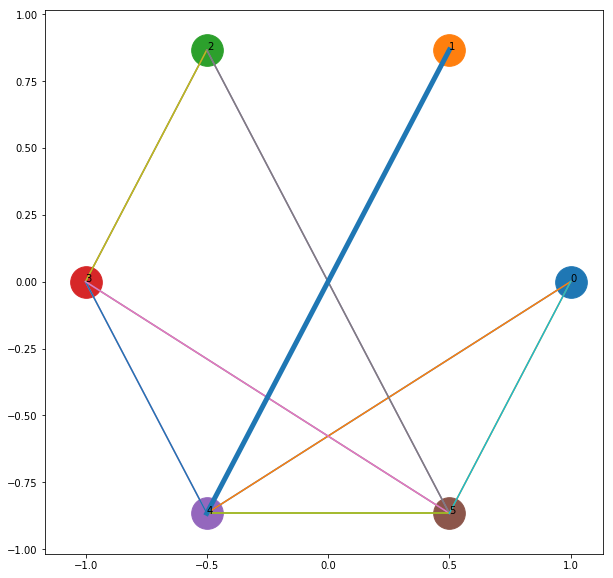

iteration 25
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
2->5 not relaxed


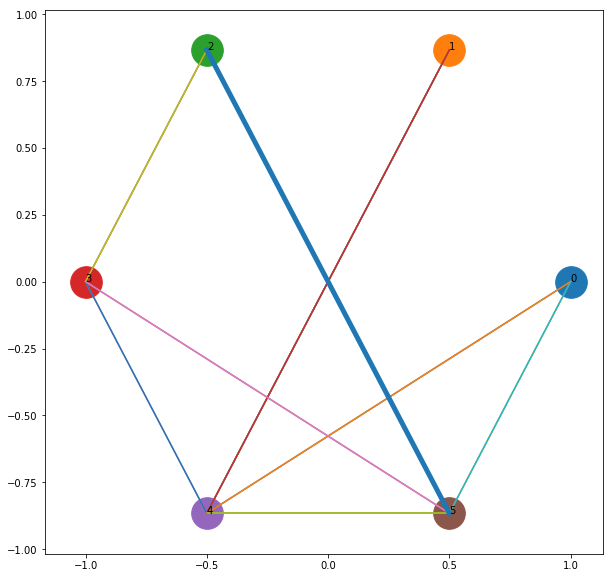

iteration 26
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
2->3 not relaxed


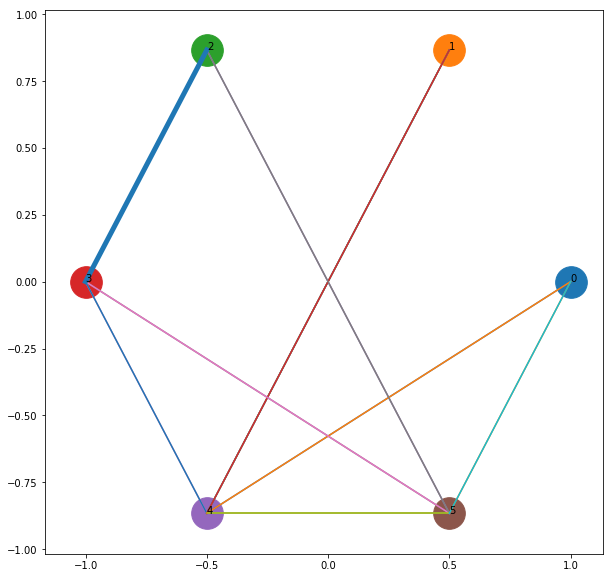

iteration 27
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
3->4 not relaxed


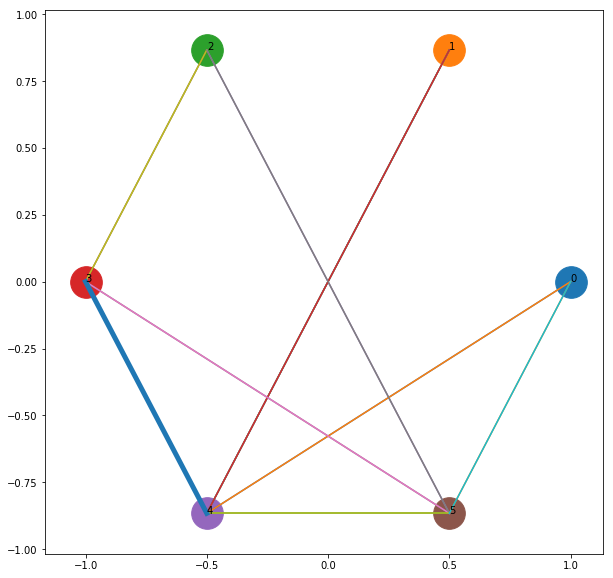

iteration 28
{0: 0, 1: 64, 2: 180, 3: 110, 4: 26, 5: 82}
3->5 not relaxed


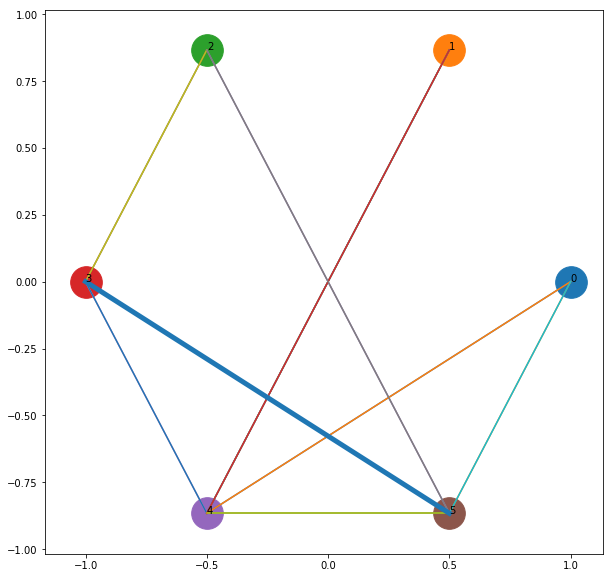

iteration 29
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
3->2 relaxed to 166


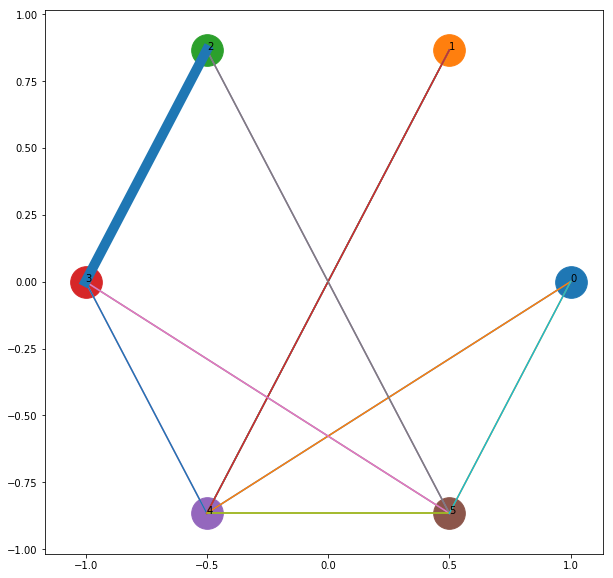

iteration 30
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->1 not relaxed


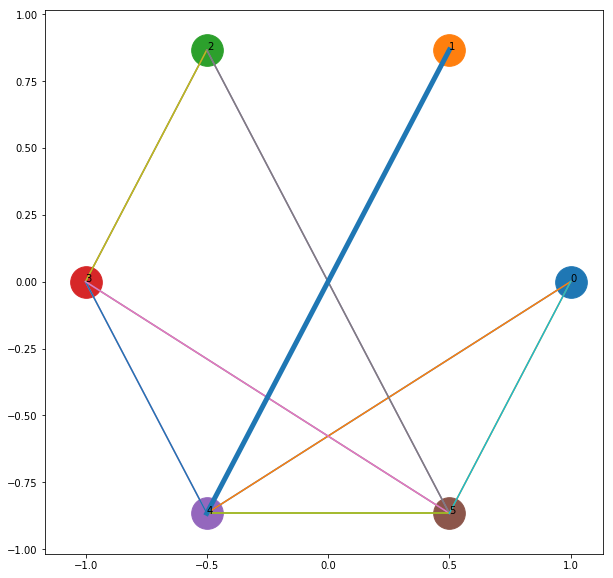

iteration 31
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->3 not relaxed


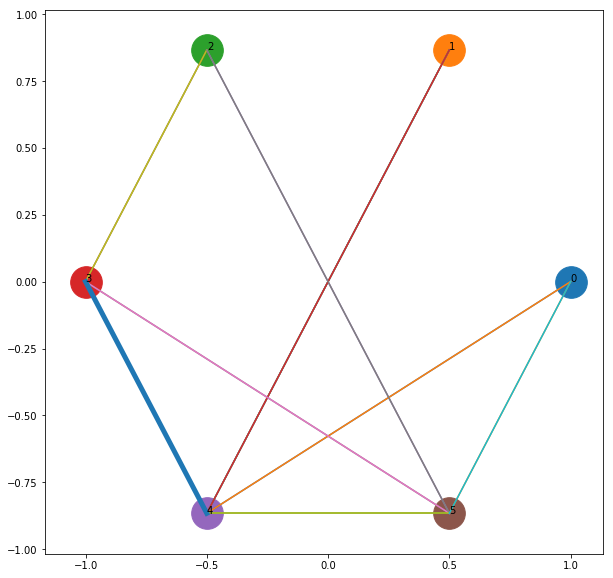

iteration 32
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->0 not relaxed


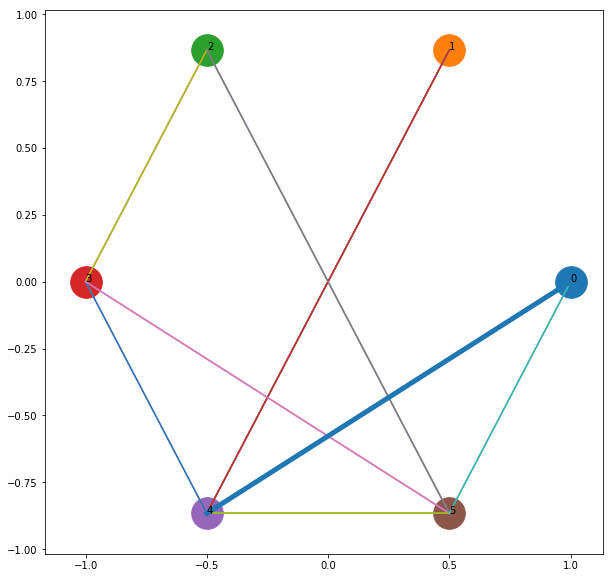

iteration 33
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->5 not relaxed


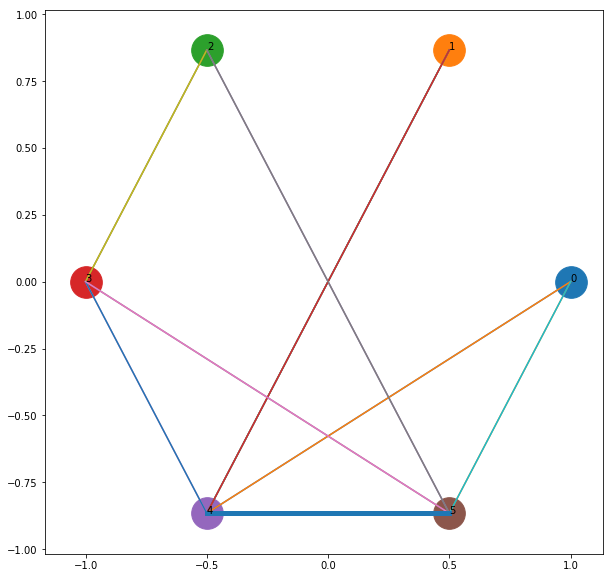

iteration 34
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->1 not relaxed


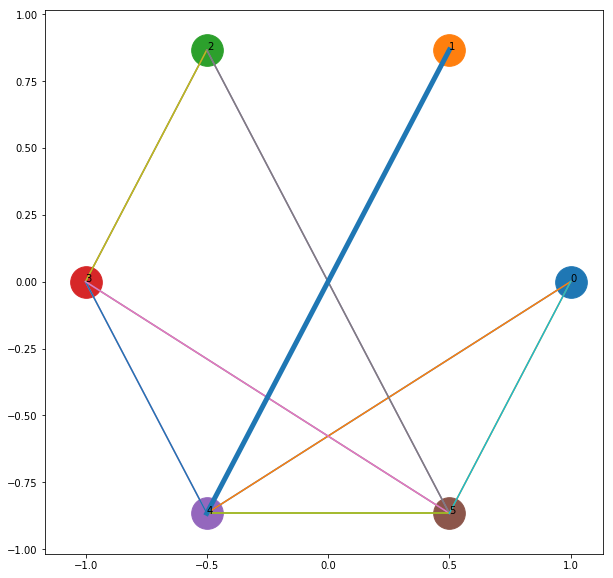

iteration 35
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->5 not relaxed


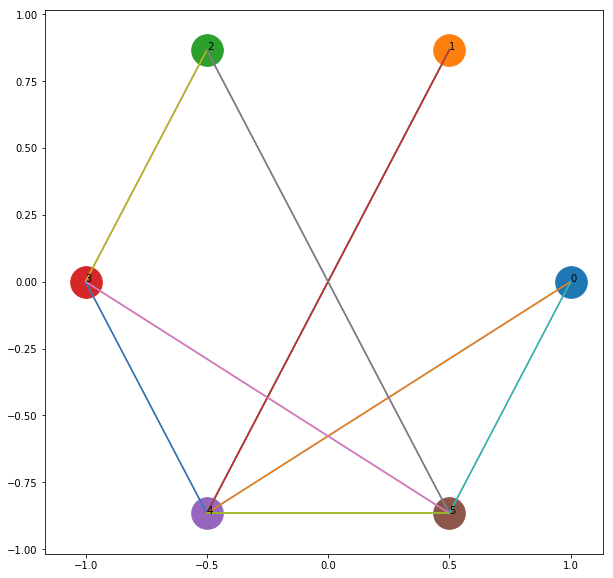

iteration 36
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->5 not relaxed


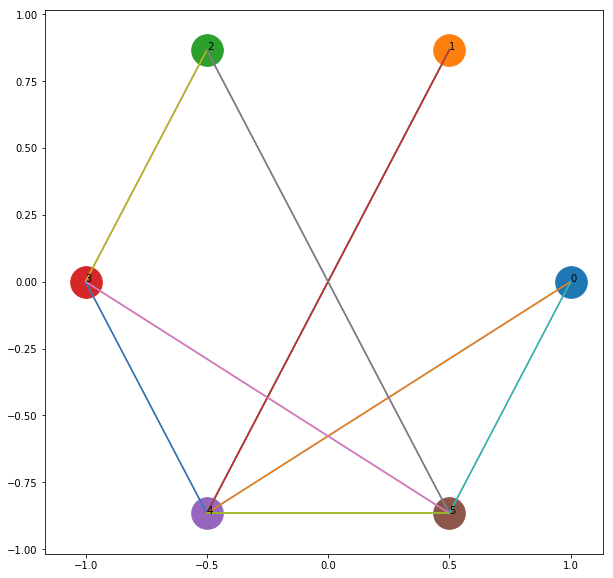

iteration 37
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->3 not relaxed


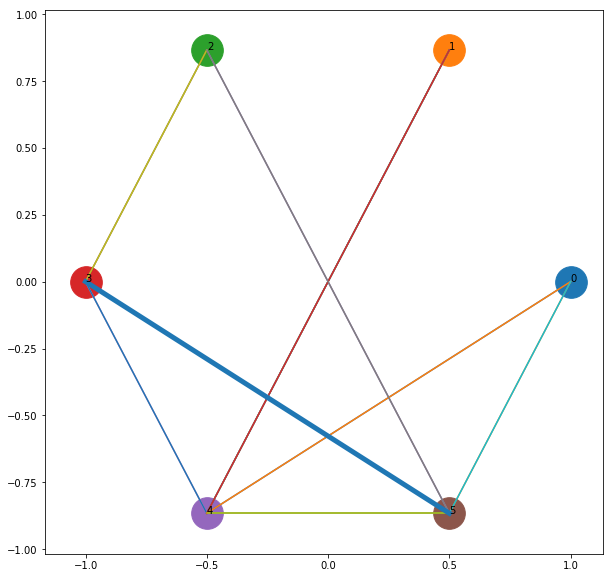

iteration 38
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->2 not relaxed


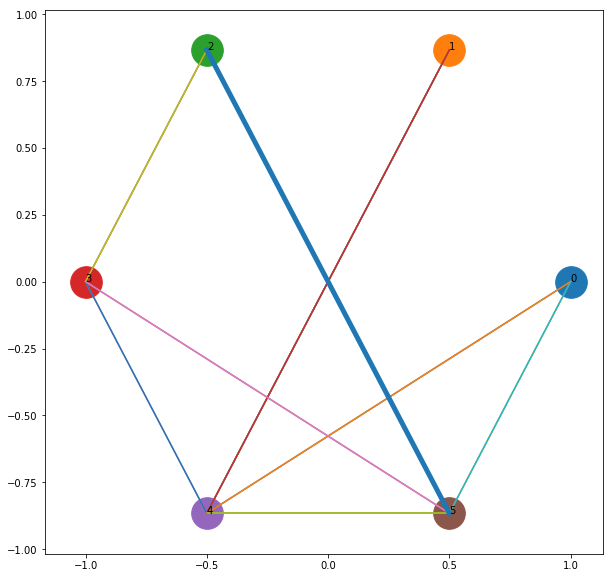

iteration 39
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->4 not relaxed


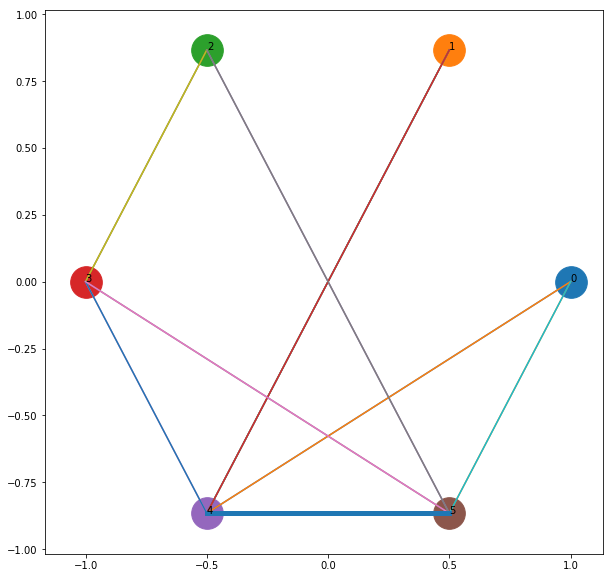

iteration 40
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->0 not relaxed


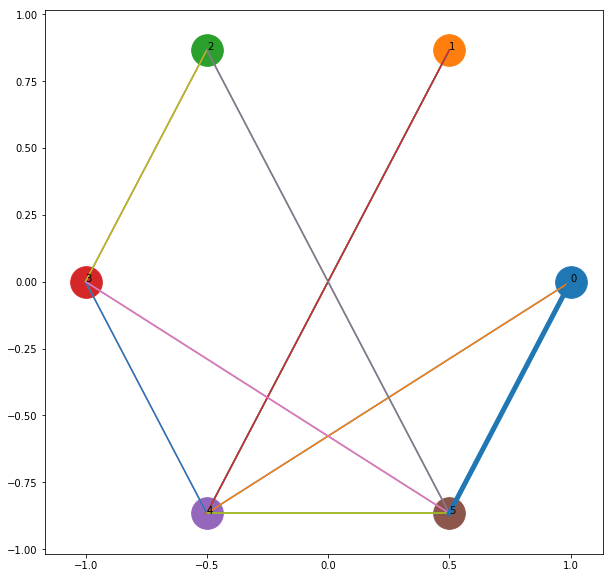

iteration 41
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
0->4 not relaxed


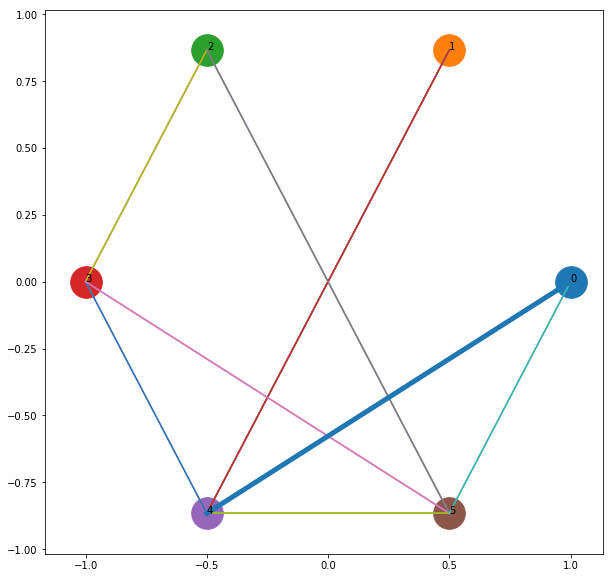

iteration 42
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
0->5 not relaxed


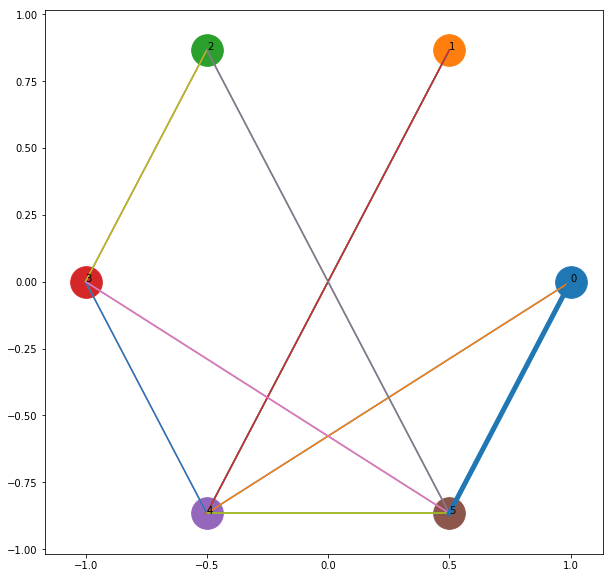

iteration 43
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
1->4 not relaxed


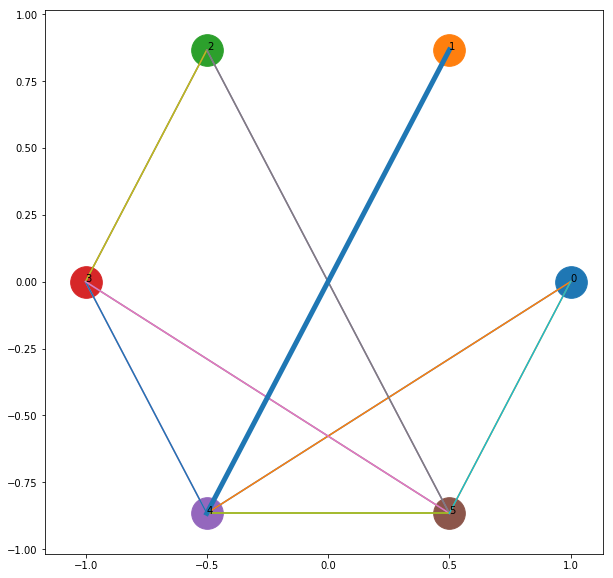

iteration 44
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
1->4 not relaxed


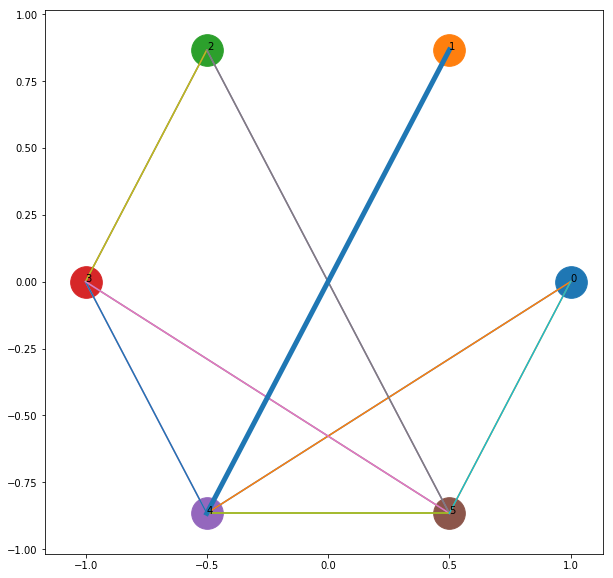

iteration 45
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
2->5 not relaxed


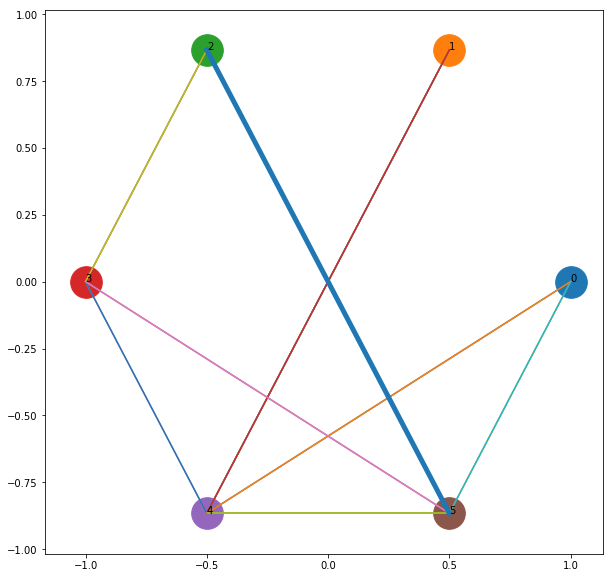

iteration 46
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
2->3 not relaxed


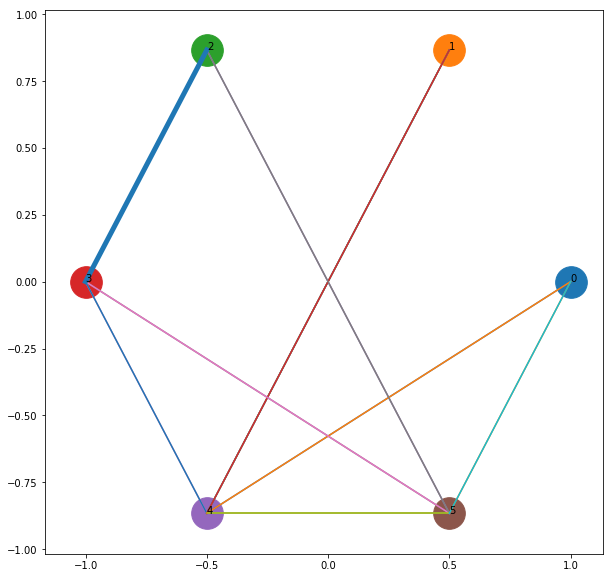

iteration 47
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
3->4 not relaxed


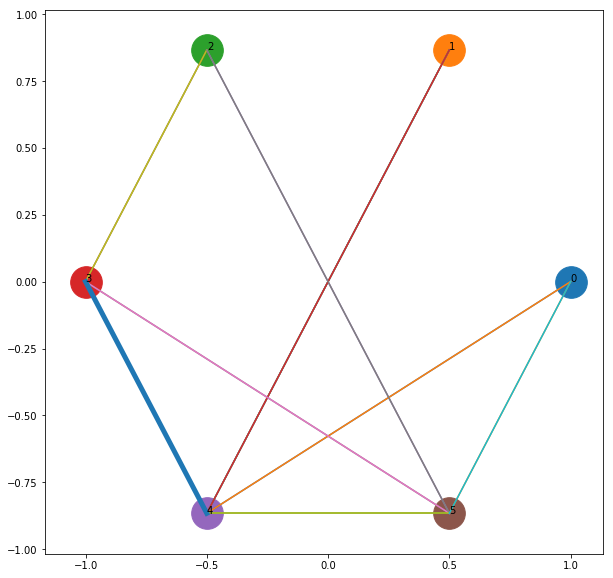

iteration 48
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
3->5 not relaxed


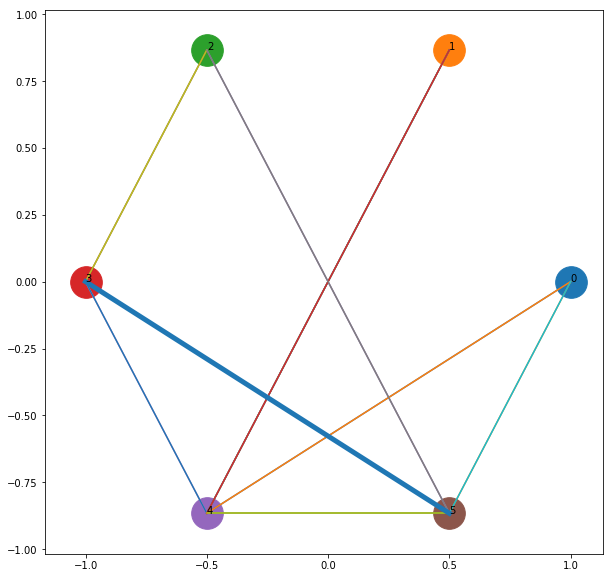

iteration 49
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
3->2 not relaxed


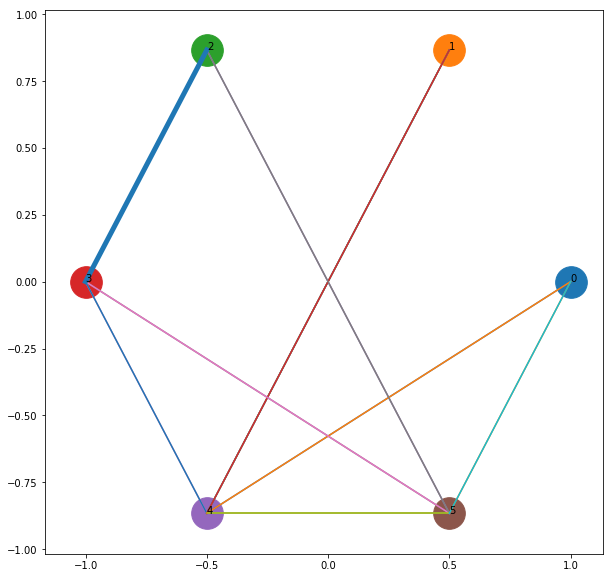

iteration 50
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->1 not relaxed


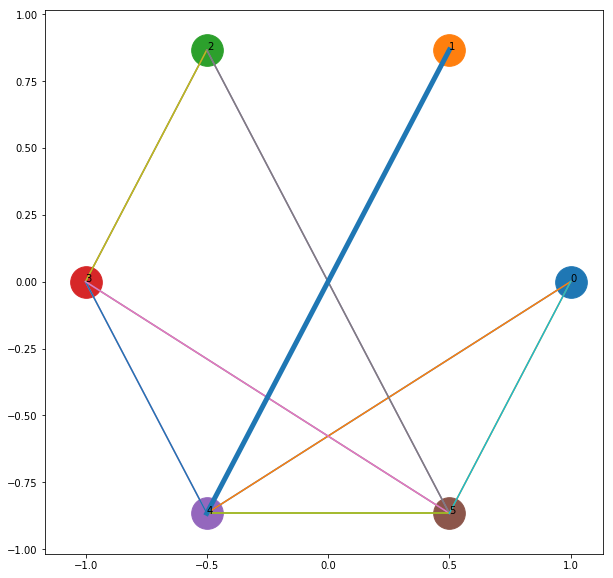

iteration 51
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->3 not relaxed


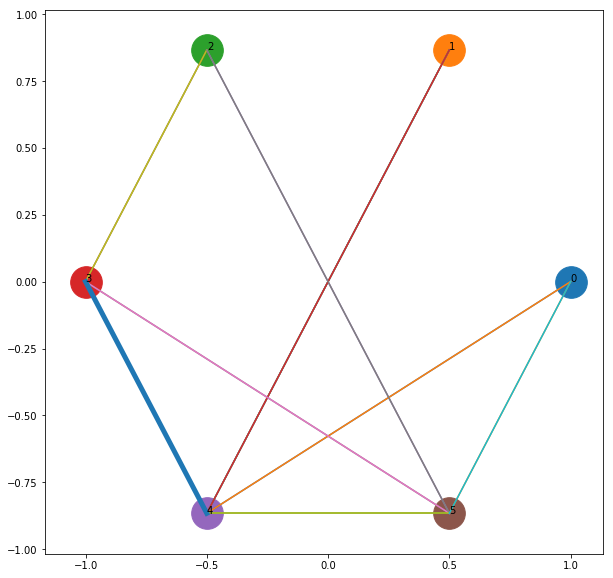

iteration 52
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->0 not relaxed


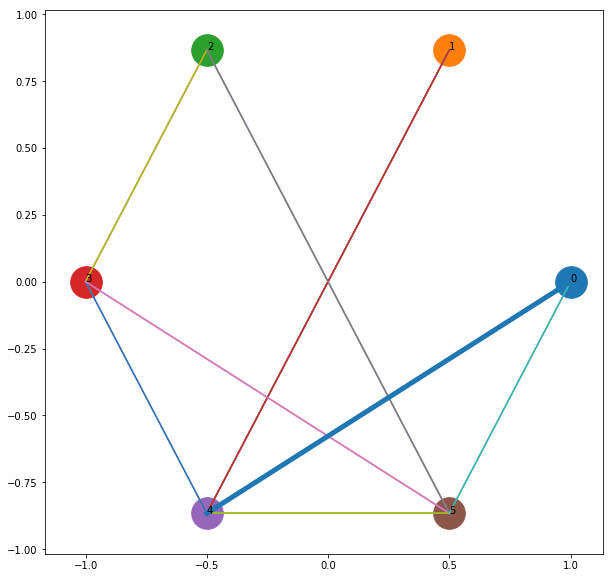

iteration 53
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->5 not relaxed


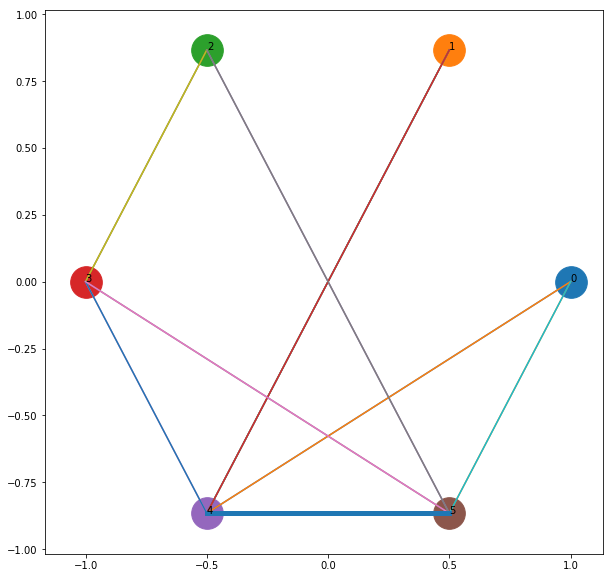

iteration 54
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
4->1 not relaxed


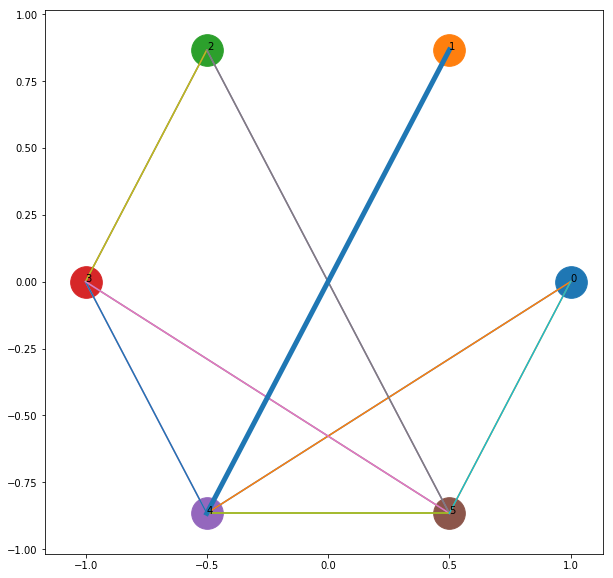

iteration 55
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->5 not relaxed


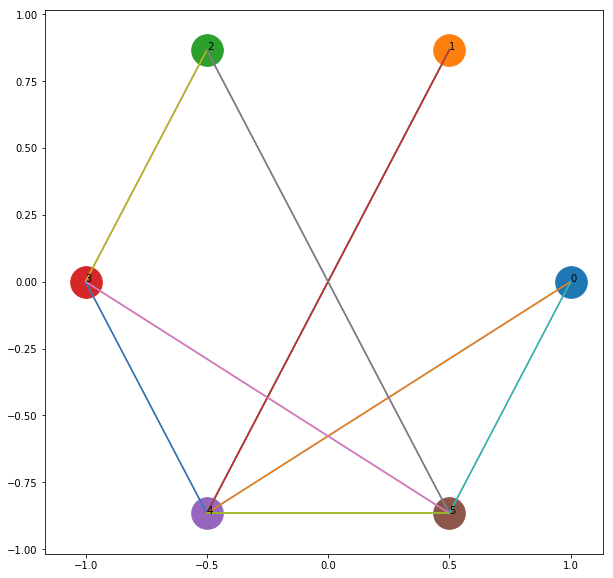

iteration 56
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->5 not relaxed


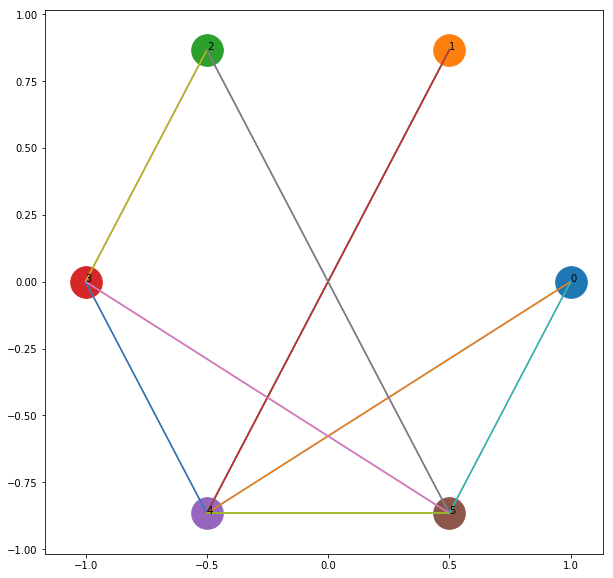

iteration 57
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->3 not relaxed


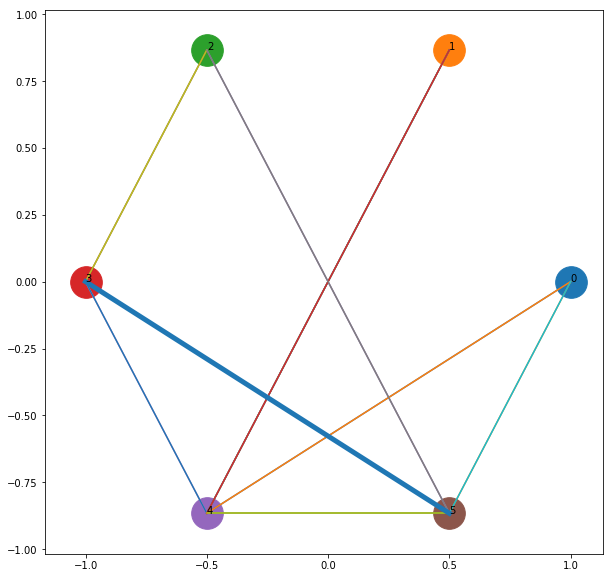

iteration 58
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->2 not relaxed


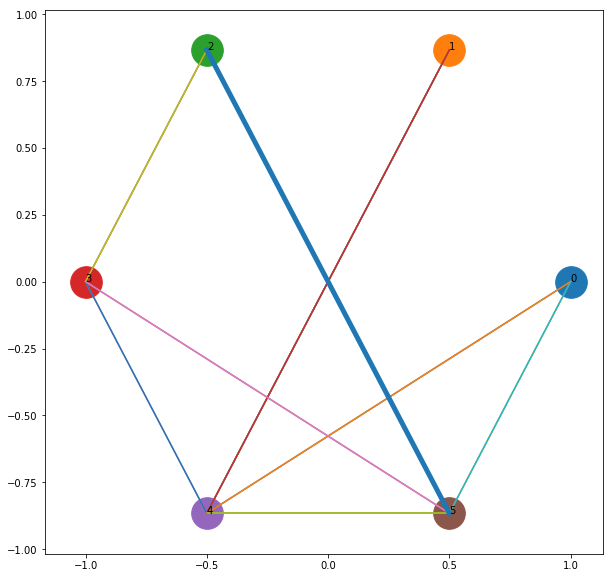

iteration 59
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->4 not relaxed


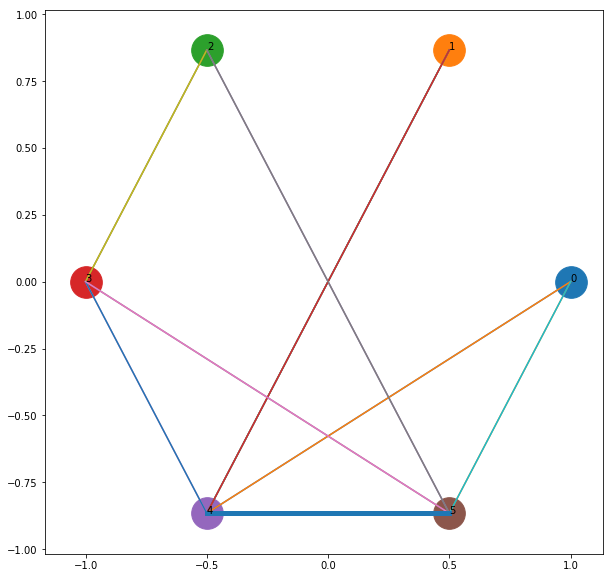

iteration 60
{0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82}
5->0 not relaxed


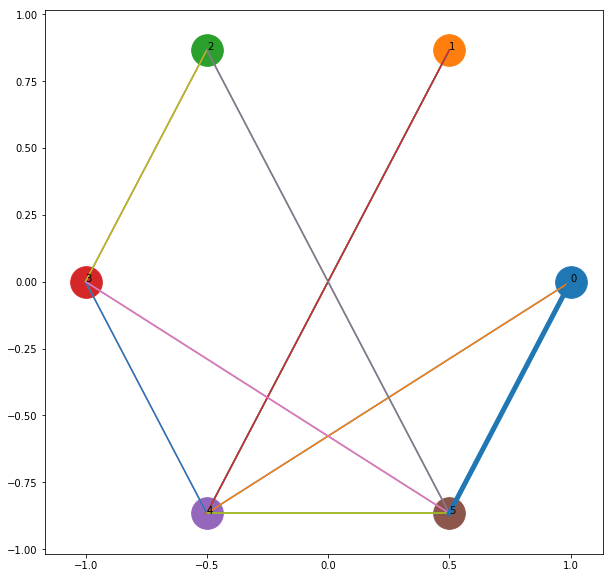

({0: 0, 1: 64, 2: 166, 3: 110, 4: 26, 5: 82},
 {0: None, 1: 4, 2: 3, 3: 5, 4: 0, 5: 0})

In [5]:
background()
plt.show()
bellman_ford(graph, SOURCE, show_callback)